In [1]:
from pathlib import Path
import pandas as pd

In [2]:
rootdir = Path('Top Country CSV')

file_list = [f for f in rootdir.glob("*.csv") if f.is_file()]

In [3]:
country_name = str(file_list[0]).split("\\")[-1].split("_")[0]
country_df = pd.read_csv(file_list[0])

country_df = country_df.drop(columns = 'Unnamed: 0')
country_df.insert(0, "Country", country_name)
country_df.head()

,Country,Artists Name,Artist ID,Track Name,Track ID,Release Date,Popularity,Danceability,Energy
0,Argentina,Daddy Yankee,4VMYDCV2IEDYJArk749S6m,Con Calma,5w9c2J52mkdntKOmRLeM2m,2019-01-24,94,0.737,0.860
1,Argentina,Pedro Capó,4QVBYiagIaa6ZGSPMbybpy,Calma - Remix,5iwz1NiezX7WWjnCgY5TH4,2018-10-05,96,0.826,0.773
2,Argentina,Anuel Aa,2R21vXR83lH98kGeO99Y66,Secreto,5W83ErFkO3aKAIS1WMi6u0,2019-01-15,95,0.807,0.803
3,Argentina,Paulo Londra,3vQ0GE3mI0dAaxIMYe5g7z,Adan y Eva,6FyRXC8tJUh863JCkyWqtk,2018-11-05,94,0.767,0.709
4,Argentina,Mau y Ricky,2wkoKEfS6dXwThbyTnZWFU,Desconocidos,0s5DNDV6LAKn2u2Ufa3VjQ,2018-10-12,92,0.709,0.771


In [4]:
for file in file_list[1:]:
    country_name = str(file).split("\\")[-1].split("_")[0]
    
    df = pd.read_csv(file)
    
    df = df.drop(columns = 'Unnamed: 0')
    df.insert(0, "Country", country_name)
    
    country_df = country_df.append(df)

In [8]:
country_df = country_df[["Country", "Danceability"]]

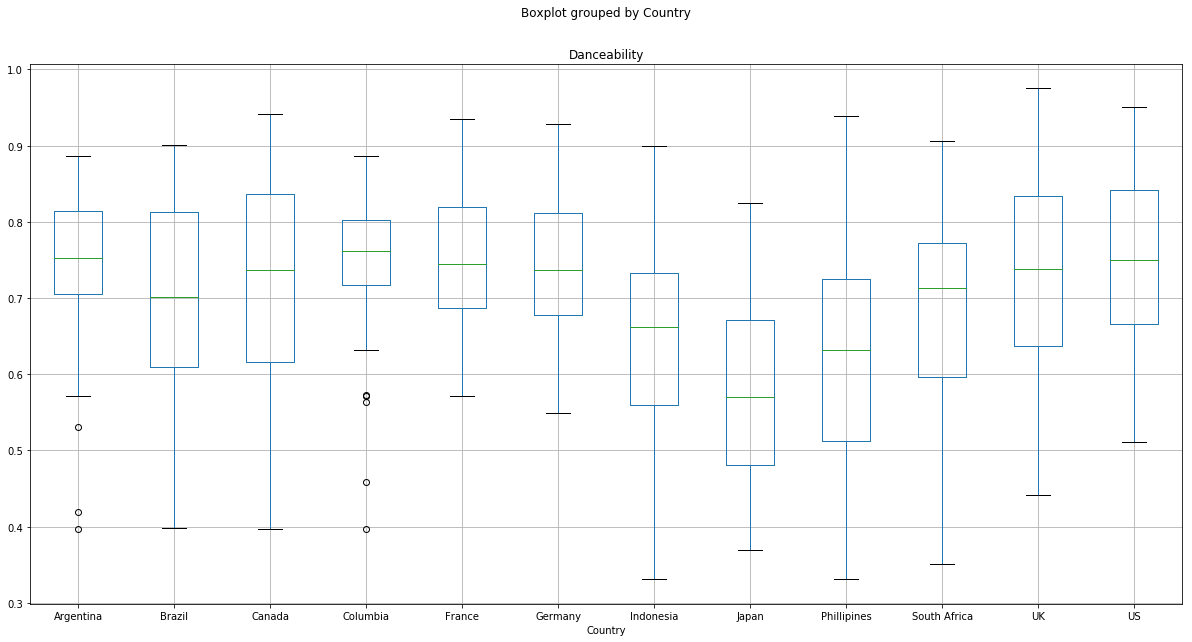

In [15]:
country_df.boxplot("Danceability", by = "Country", figsize = (20,10))